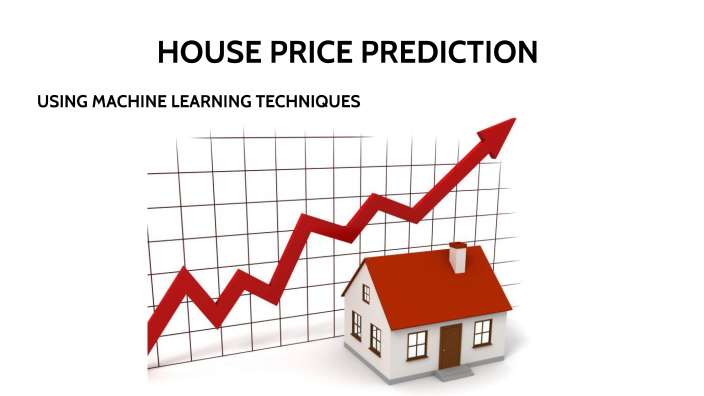

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

import warnings
warnings.filterwarnings('ignore')

In [2]:
cd=pd.read_csv('/kaggle/input/bengaluru-house-data/Bengaluru_House_Data.csv')

* 📌 Area_type - Description of the area
* 📌 Availability - When it can be possessed or when it is ready
* 📌 Location - Where it is located in Bengaluru
* 📌 Size - BHK or Bedrooms
* 📌 Society - To which society it belongs
* 📌 Total_sqft - Size of the property in sq.ft
* 📌 Bath - No. of Bathrooms
* 📌 Balcony - No. of the Balcony
* 📌 Price - Value of the property in lakhs (Indian Rupee - ₹)

In [3]:
cd.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


# **Handling Null Value**

In [4]:
cd.isnull().sum()

area_type          0
availability       0
location           1
size              16
society         5502
total_sqft         0
bath              73
balcony          609
price              0
dtype: int64

In [5]:
import numpy as np

# Convert infinite values to NaN in the DataFrame
cd.replace([np.inf, -np.inf], np.nan, inplace=True)

In [6]:
cd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13320 entries, 0 to 13319
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   area_type     13320 non-null  object 
 1   availability  13320 non-null  object 
 2   location      13319 non-null  object 
 3   size          13304 non-null  object 
 4   society       7818 non-null   object 
 5   total_sqft    13320 non-null  object 
 6   bath          13247 non-null  float64
 7   balcony       12711 non-null  float64
 8   price         13320 non-null  float64
dtypes: float64(3), object(6)
memory usage: 936.7+ KB


In [7]:
for i in cd.columns:
    print(cd[i].value_counts())
    print('*'*20)

area_type
Super built-up  Area    8790
Built-up  Area          2418
Plot  Area              2025
Carpet  Area              87
Name: count, dtype: int64
********************
availability
Ready To Move    10581
18-Dec             307
18-May             295
18-Apr             271
18-Aug             200
                 ...  
15-Dec               1
16-Oct               1
16-Jan               1
14-Nov               1
14-Jul               1
Name: count, Length: 81, dtype: int64
********************
location
Whitefield                 540
Sarjapur  Road             399
Electronic City            302
Kanakpura Road             273
Thanisandra                234
                          ... 
Park View Layout             1
Xavier Layout                1
Air View Colony              1
akshaya nagar t c palya      1
mvj engineering college      1
Name: count, Length: 1305, dtype: int64
********************
size
2 BHK         5199
3 BHK         4310
4 Bedroom      826
4 BHK          591
3 Bedroom 

Replacing null value with mode value of column location, size and balcony

In [8]:
import statistics as st
#cd['location'].fillna(st.mode(cd['location']),inplace=True)  this can be use but chained assginment

# Use the recommended approach
cd['location'] = cd['location'].fillna(st.mode(cd['location']))

In [9]:
cd['size']= cd['size'].fillna(st.mode(cd['size']))

In [10]:
cd['balcony']= cd['balcony'].fillna(value=st.mode(cd['balcony']))

In [11]:
totalvalue=np.prod(cd.shape)
missing=cd['society'].isnull().sum()
(missing/totalvalue)*100

4.58958958958959

Missing percentage is almost 5% which more compared to dataset.

In [12]:
#cd.drop(['area_type','society'],axis=1,inplace=True)
cd.drop(['society','area_type'],axis=1,inplace=True)

Drop society and area_type column because many missing value and not needed futher.

In [13]:
cd.describe().T

,count,mean,std,min,25%,50%,75%,max
bath,13247.0,2.692610,1.341458,1.0,2.0,2.0,3.0,40.0
balcony,13320.0,1.603378,0.803067,0.0,1.0,2.0,2.0,3.0
price,13320.0,112.565627,148.971674,8.0,50.0,72.0,120.0,3600.0


<Axes: xlabel='bath', ylabel='Count'>

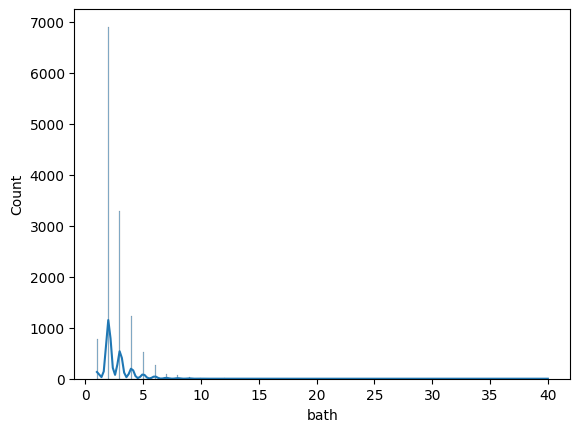

In [14]:
sns.histplot(data=cd,x='bath',kde=True)

<Axes: >

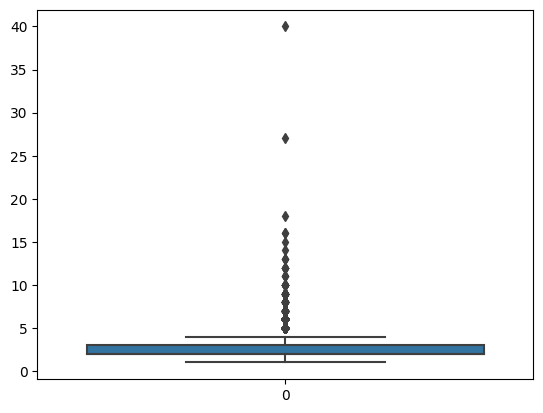

In [15]:
sns.boxplot(cd['bath'])

In [16]:
cd[cd['bath']>3]

,availability,location,size,total_sqft,bath,balcony,price
1,Ready To Move,Chikka Tirupathi,4 Bedroom,2600,5.0,3.0,120.0
6,18-May,Old Airport Road,4 BHK,2732,4.0,2.0,204.0
7,Ready To Move,Rajaji Nagar,4 BHK,3300,4.0,2.0,600.0
9,Ready To Move,Gandhi Bazar,6 Bedroom,1020,6.0,2.0,370.0
11,Ready To Move,Whitefield,4 Bedroom,2785,5.0,3.0,295.0
...,...,...,...,...,...,...,...
13306,Ready To Move,Rajarajeshwari Nagara,4 Bedroom,1200,5.0,2.0,325.0
13311,Ready To Move,Ramamurthy Nagar,7 Bedroom,1500,9.0,2.0,250.0
13315,Ready To Move,Whitefield,5 Bedroom,3453,4.0,0.0,231.0
13316,Ready To Move,Richards Town,4 BHK,3600,5.0,2.0,400.0


In [17]:
cd['bath']= cd['bath'].fillna(2)

In [18]:
cd.isnull().sum()

availability    0
location        0
size            0
total_sqft      0
bath            0
balcony         0
price           0
dtype: int64

In size column we see some rows has bedroom or BHK values

In [19]:
cd['size']=cd['size'].str.split().str.get(0).astype(int)

In [20]:
cd.head()

,availability,location,size,total_sqft,bath,balcony,price
0,19-Dec,Electronic City Phase II,2,1056,2.0,1.0,39.07
1,Ready To Move,Chikka Tirupathi,4,2600,5.0,3.0,120.00
2,Ready To Move,Uttarahalli,3,1440,2.0,3.0,62.00
3,Ready To Move,Lingadheeranahalli,3,1521,3.0,1.0,95.00
4,Ready To Move,Kothanur,2,1200,2.0,1.0,51.00


In [21]:
cd['total_sqft'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 13320 entries, 0 to 13319
Series name: total_sqft
Non-Null Count  Dtype 
--------------  ----- 
13320 non-null  object
dtypes: object(1)
memory usage: 104.2+ KB


In total_sqft column some range are present we need to replace with its mean value

cd['total_sqft'].astype(int)
ValueError: invalid literal for int() with base 10: '2100 - 2850'

In [22]:
import re
def range_to_mean(range_str):
    range_str = range_str.strip()
    if '-' in range_str:
        start, end = map(float, range_str.split('-'))  # Convert to float instead of int
        return (start + end) / 2
    else:
        numeric_value = re.search(r'[\d.]+', range_str)
        if numeric_value:
            return float(numeric_value.group())  # Extract the matched string and convert it to float
        else:
            return None
cd['total_sqft'] = cd['total_sqft'].apply(range_to_mean)


In [23]:
cd.head()

,availability,location,size,total_sqft,bath,balcony,price
0,19-Dec,Electronic City Phase II,2,1056.0,2.0,1.0,39.07
1,Ready To Move,Chikka Tirupathi,4,2600.0,5.0,3.0,120.00
2,Ready To Move,Uttarahalli,3,1440.0,2.0,3.0,62.00
3,Ready To Move,Lingadheeranahalli,3,1521.0,3.0,1.0,95.00
4,Ready To Move,Kothanur,2,1200.0,2.0,1.0,51.00


In [24]:
cd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13320 entries, 0 to 13319
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   availability  13320 non-null  object 
 1   location      13320 non-null  object 
 2   size          13320 non-null  int64  
 3   total_sqft    13320 non-null  float64
 4   bath          13320 non-null  float64
 5   balcony       13320 non-null  float64
 6   price         13320 non-null  float64
dtypes: float64(4), int64(1), object(2)
memory usage: 728.6+ KB


the price is given in lakhs(Decimal)

In [25]:
cd['price_per_sqft']=cd['price']*100000/cd['total_sqft']

In [26]:
cd.rename(columns={'size':'BHK'},inplace=True)

In [27]:
cd.head()

,availability,location,BHK,total_sqft,bath,balcony,price,price_per_sqft
0,19-Dec,Electronic City Phase II,2,1056.0,2.0,1.0,39.07,3699.810606
1,Ready To Move,Chikka Tirupathi,4,2600.0,5.0,3.0,120.00,4615.384615
2,Ready To Move,Uttarahalli,3,1440.0,2.0,3.0,62.00,4305.555556
3,Ready To Move,Lingadheeranahalli,3,1521.0,3.0,1.0,95.00,6245.890861
4,Ready To Move,Kothanur,2,1200.0,2.0,1.0,51.00,4250.000000


In [28]:
cd.describe()

,BHK,total_sqft,bath,balcony,price,price_per_sqft
count,13320.000000,13320.000000,13320.000000,13320.000000,13320.000000,1.332000e+04
mean,2.802778,1555.971707,2.688814,1.603378,112.565627,1.234333e+04
std,1.294496,1238.902448,1.338754,0.803067,148.971674,2.256394e+05
min,1.000000,1.000000,1.000000,0.000000,8.000000,2.678298e+02
25%,2.000000,1100.000000,2.000000,1.000000,50.000000,4.271723e+03
50%,3.000000,1275.000000,2.000000,2.000000,72.000000,5.444545e+03
75%,3.000000,1679.250000,3.000000,2.000000,120.000000,7.335907e+03
max,43.000000,52272.000000,40.000000,3.000000,3600.000000,1.600000e+07


Cleaning location column

In [29]:
cd['location'].value_counts()

location
Whitefield                 541
Sarjapur  Road             399
Electronic City            302
Kanakpura Road             273
Thanisandra                234
                          ... 
Park View Layout             1
Xavier Layout                1
Air View Colony              1
akshaya nagar t c palya      1
mvj engineering college      1
Name: count, Length: 1305, dtype: int64

In [30]:
cd['location']=cd['location'].apply(lambda x:x.strip() )
a=cd['location'].value_counts()
b=a[a<10]

Change whose location countig are less than 10

In [31]:
cd['location']=cd['location'].apply(lambda x: 'Other' if x in b else x)

In [32]:
cd['location'].value_counts()

location
Other                    2755
Whitefield                542
Sarjapur  Road            399
Electronic City           304
Kanakpura Road            273
                         ... 
Basapura                   10
Dairy Circle               10
Kalkere                    10
1st Block Koramangala      10
Nagadevanahalli            10
Name: count, Length: 255, dtype: int64

In availability column there are many values. We will change other values to Not Ready except Ready to Move. 

In [33]:
cd['availability']=cd['availability'].apply(lambda x: 'Not Ready' if x != 'Ready To Move' else x)

## Handling Outliers

[Text(0.5, 1.0, 'Price')]

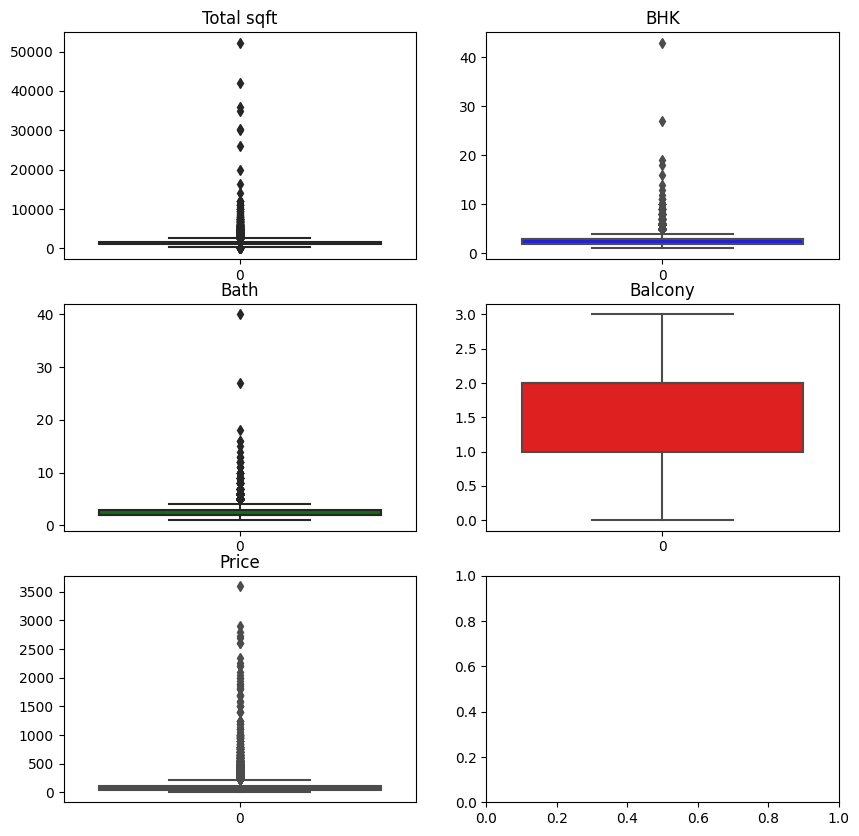

In [34]:
fig, axes = plt.subplots(3,2 , figsize=(10, 10))

sns.boxplot(data=cd['total_sqft'],ax=axes[0,0],color='purple').set(title='Total sqft')
sns.boxplot(data=cd['BHK'],ax=axes[0,1],color='blue').set(title='BHK')
sns.boxplot(data=cd['bath'],ax=axes[1,0],color='green').set(title='Bath')
sns.boxplot(data=cd['balcony'],ax=axes[1,1],color='red').set(title='Balcony')
sns.boxplot(data=cd['price'],ax=axes[2,0],color='orange').set(title='Price')


As we can see in column total_sqft some values having 1sqft as value which is irrelevant.

In [35]:
cd.describe().T

,count,mean,std,min,25%,50%,75%,max
BHK,13320.0,2.802778,1.294496,1.000000,2.000000,3.000000,3.000000,43.0
total_sqft,13320.0,1555.971707,1238.902448,1.000000,1100.000000,1275.000000,1679.250000,52272.0
bath,13320.0,2.688814,1.338754,1.000000,2.000000,2.000000,3.000000,40.0
balcony,13320.0,1.603378,0.803067,0.000000,1.000000,2.000000,2.000000,3.0
price,13320.0,112.565627,148.971674,8.000000,50.000000,72.000000,120.000000,3600.0
price_per_sqft,13320.0,12343.332814,225639.448587,267.829813,4271.722691,5444.545271,7335.907336,16000000.0


Lets check sqft per bhk

In [36]:
(cd['total_sqft']/cd['BHK']).describe()

count    13320.000000
mean       573.603223
std        388.596583
min          0.250000
25%        472.500000
50%        551.833333
75%        625.000000
max      26136.000000
dtype: float64

As we can see some values having irrevalant sqft values

In [37]:
cd=cd[((cd['total_sqft']/cd['BHK'])>=300)]

In [38]:
(cd['total_sqft']/cd['BHK']).describe()

count    12538.000000
mean       597.817484
std        387.521240
min        300.000000
25%        492.000000
50%        562.500000
75%        630.333333
max      26136.000000
dtype: float64

<Axes: >

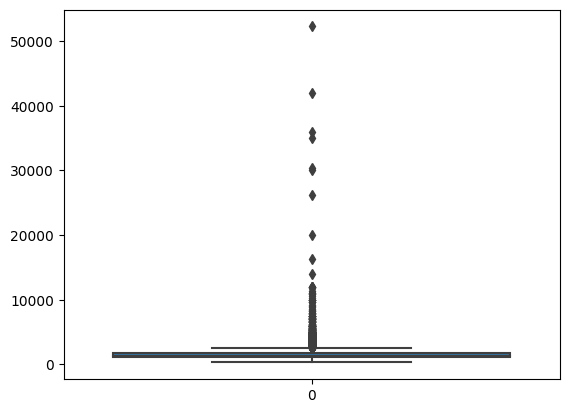

In [39]:
sns.boxplot(cd['total_sqft'])

In [40]:
cd.head()

,availability,location,BHK,total_sqft,bath,balcony,price,price_per_sqft
0,Not Ready,Electronic City Phase II,2,1056.0,2.0,1.0,39.07,3699.810606
1,Ready To Move,Chikka Tirupathi,4,2600.0,5.0,3.0,120.00,4615.384615
2,Ready To Move,Uttarahalli,3,1440.0,2.0,3.0,62.00,4305.555556
3,Ready To Move,Lingadheeranahalli,3,1521.0,3.0,1.0,95.00,6245.890861
4,Ready To Move,Kothanur,2,1200.0,2.0,1.0,51.00,4250.000000


In [41]:
cd.total_sqft.describe()

count    12538.000000
mean      1594.853464
std       1261.221561
min        300.000000
25%       1116.000000
50%       1300.000000
75%       1700.000000
max      52272.000000
Name: total_sqft, dtype: float64

In [42]:
def remove_outliers_sqft(df):
  df_output = pd.DataFrame()
  for key,subdf in df.groupby('location'):
    m = np.mean(subdf.price_per_sqft)
    st = np.std(subdf.price_per_sqft)

    gen_df = subdf[(subdf.price_per_sqft > (m-st))&(subdf.price_per_sqft <= (m+st))]
    df_output = pd.concat([df_output,gen_df],ignore_index = True)
  return df_output
cd = remove_outliers_sqft(cd)

In [43]:
def bhk_outlier_remove(df):
  exclude_indices = np.array([])
  for location, location_df in df.groupby('location'):
    bhk_stats = {}
    for bhk,bhk_df in location_df.groupby('BHK'):
      bhk_stats[bhk] = {
          'mean':np.mean(bhk_df.price_per_sqft)
          ,'std':np.std(bhk_df.price_per_sqft)
          ,'count':bhk_df.shape[0]
      }
    for bhk,bhk_df in location_df.groupby('BHK'):
      stats = bhk_stats.get(bhk-1)
      if stats and stats['count']>5:
        exclude_indices = np.append(exclude_indices,bhk_df[bhk_df.price_per_sqft<(stats['mean'])].index.values)
    return df.drop(exclude_indices,axis='index')
cd = bhk_outlier_remove(cd)

In [44]:
cd.describe().T

,count,mean,std,min,25%,50%,75%,max
BHK,10289.0,2.577218,0.902999,1.0,2.0,2.000000,3.000000,16.000000
total_sqft,10289.0,1510.472126,883.540936,300.0,1110.0,1286.000000,1650.000000,30400.000000
bath,10289.0,2.474973,0.989044,1.0,2.0,2.000000,3.000000,16.000000
balcony,10289.0,1.606862,0.786177,0.0,1.0,2.000000,2.000000,3.000000
price,10289.0,91.748996,88.327358,10.0,49.0,67.000000,100.000000,2200.000000
price_per_sqft,10289.0,5669.376989,2292.510518,1250.0,4250.0,5176.565008,6432.748538,24509.803922


Outliers are removed from dataset

# **Data Visualization**

In [45]:
cd.columns

Index(['availability', 'location', 'BHK', 'total_sqft', 'bath', 'balcony',
       'price', 'price_per_sqft'],
      dtype='object')

In [46]:
cd['location'].value_counts()

location
Other                   2209
Whitefield               485
Sarjapur  Road           305
Electronic City          279
Kanakpura Road           196
                        ... 
Vishveshwarya Layout       4
Banjara Layout             4
HAL 2nd Stage              4
BTM 1st Stage              3
Marsur                     3
Name: count, Length: 255, dtype: int64

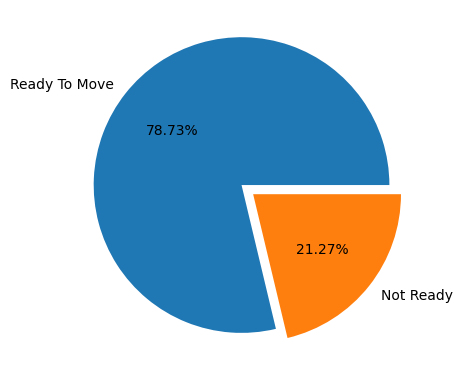

In [47]:
avail=cd['availability'].value_counts()
plt.pie(x=avail,labels=avail.index,autopct="%.2f%%",explode=(0.1, 0))
plt.show()

<Axes: xlabel='balcony', ylabel='count'>

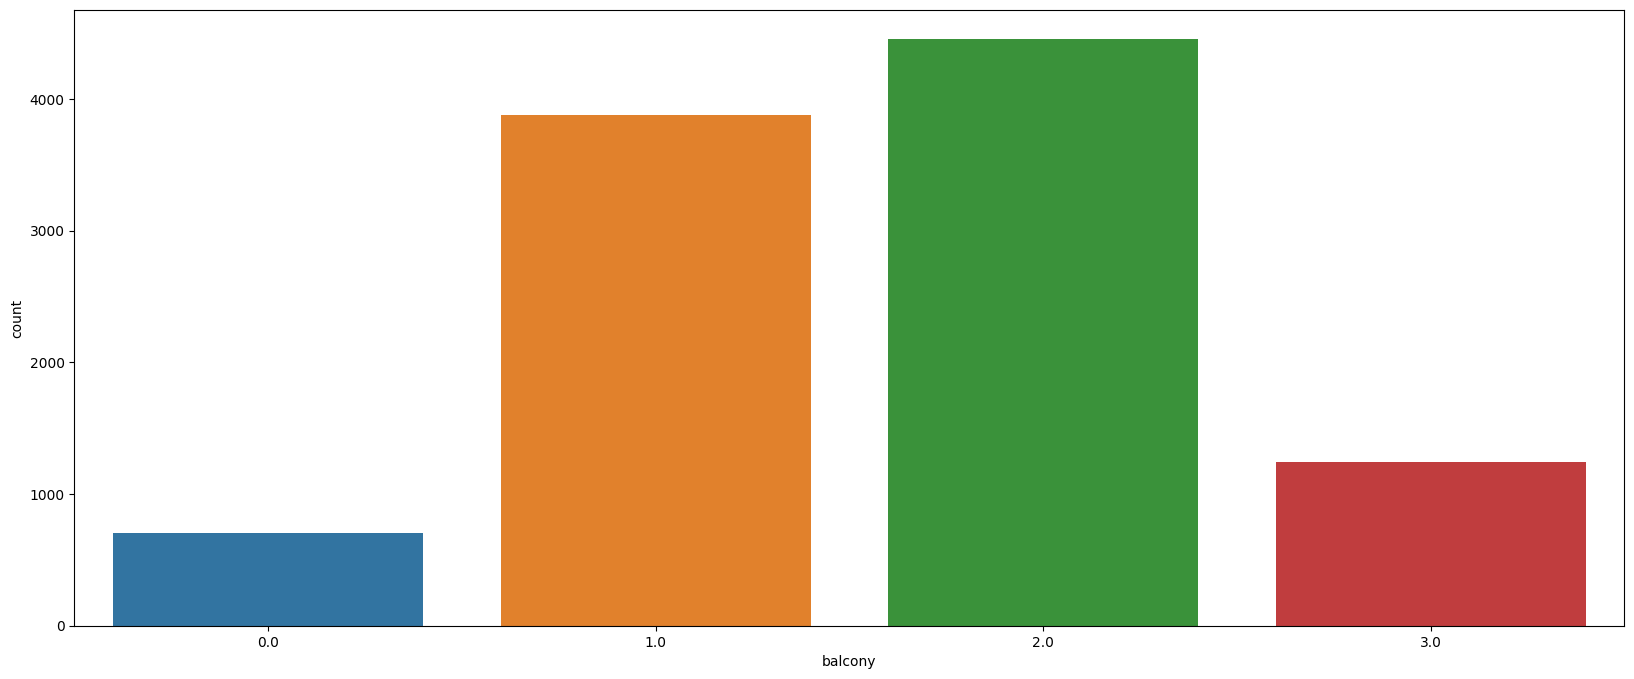

In [48]:
plt.figure(figsize = (20,8))
sns.countplot(x = 'balcony', data = cd)

<Axes: >

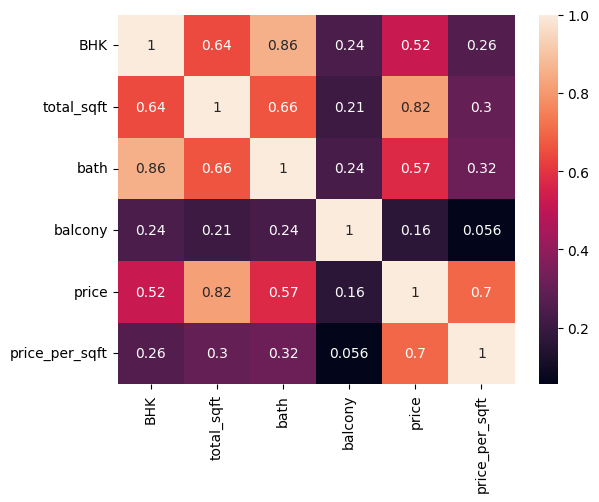

In [49]:
col=cd.select_dtypes(exclude='object')
sns.heatmap(col.corr(),annot=True)

<Axes: xlabel='BHK', ylabel='bath'>

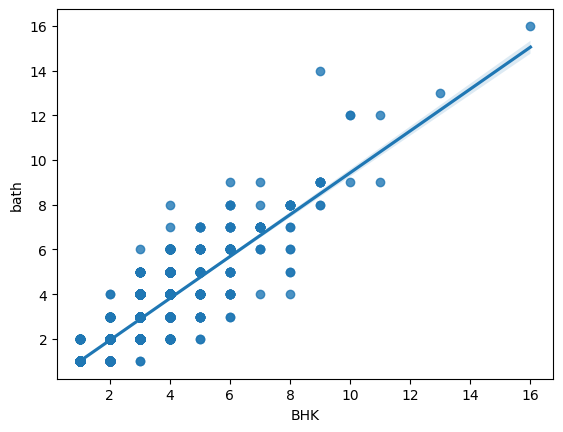

In [50]:
sns.regplot(data=cd,x='BHK',y='bath',fit_reg=True)

<Axes: xlabel='total_sqft', ylabel='bath'>

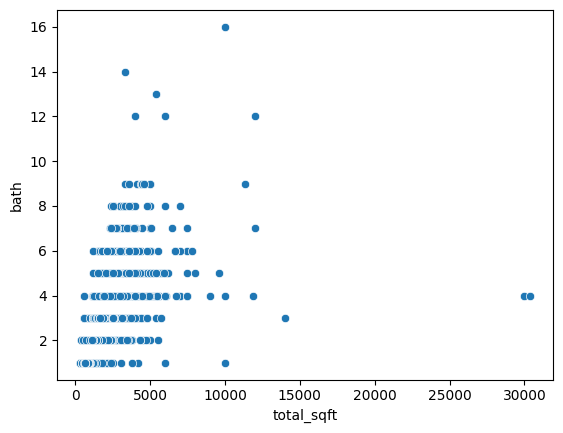

In [51]:
sns.scatterplot(data=cd,x='total_sqft',y='bath')

<Axes: xlabel='price', ylabel='Density'>

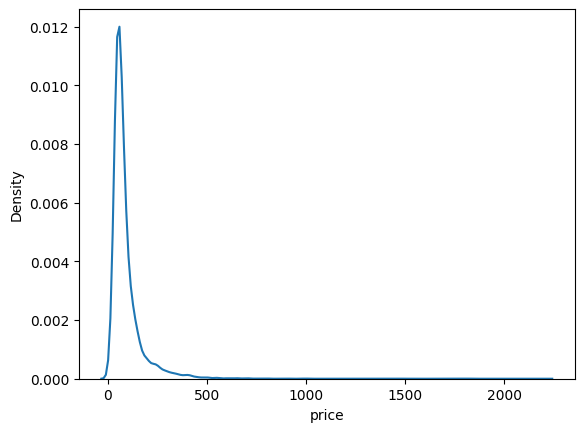

In [52]:
sns.kdeplot(data=cd,x='price')

<Axes: xlabel='price', ylabel='total_sqft'>

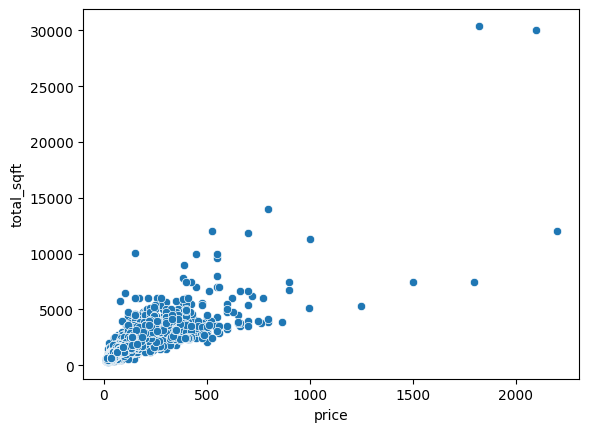

In [53]:
sns.scatterplot(data=cd,x='price',y='total_sqft')

<Axes: xlabel='BHK', ylabel='price'>

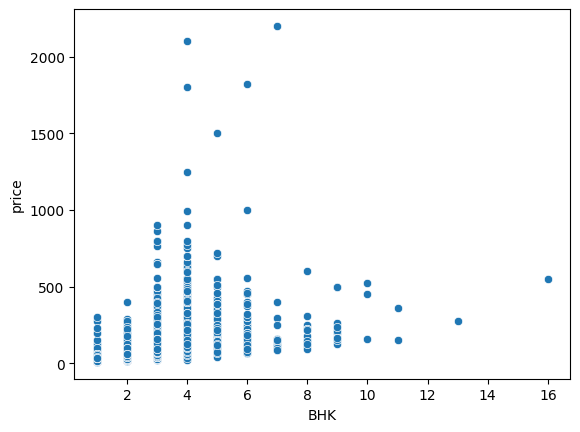

In [54]:
sns.scatterplot(data=cd,y='price',x='BHK')

# **Machine Learning**

**Converting categorical data 'availability' to numeric**

In [55]:
cd['availability'].value_counts()

availability
Ready To Move    8101
Not Ready        2188
Name: count, dtype: int64

In [56]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
cd['availability'] = label_encoder.fit_transform(cd['availability'])

We will uses only one ML model Linear Regression

In [57]:
cd.head()

,availability,location,BHK,total_sqft,bath,balcony,price,price_per_sqft
0,0,1st Block Jayanagar,4,2850.0,4.0,1.0,428.0,15017.543860
1,0,1st Block Jayanagar,3,1630.0,3.0,2.0,194.0,11901.840491
2,1,1st Block Jayanagar,3,1875.0,2.0,3.0,235.0,12533.333333
3,0,1st Block Jayanagar,3,1200.0,2.0,0.0,130.0,10833.333333
4,0,1st Block Jayanagar,2,1235.0,2.0,2.0,148.0,11983.805668


In [58]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import make_column_transformer

# Create a column transformer
column_trans = make_column_transformer(
    (OneHotEncoder(), ['location']),  # Encode 'location' column
    remainder='passthrough'  # Pass through other columns unchanged
)


In [59]:
column_trans

ColumnTransformer(remainder='passthrough',
                  transformers=[('onehotencoder', OneHotEncoder(),
                                 ['location'])])

In [60]:
cd.head()

,availability,location,BHK,total_sqft,bath,balcony,price,price_per_sqft
0,0,1st Block Jayanagar,4,2850.0,4.0,1.0,428.0,15017.543860
1,0,1st Block Jayanagar,3,1630.0,3.0,2.0,194.0,11901.840491
2,1,1st Block Jayanagar,3,1875.0,2.0,3.0,235.0,12533.333333
3,0,1st Block Jayanagar,3,1200.0,2.0,0.0,130.0,10833.333333
4,0,1st Block Jayanagar,2,1235.0,2.0,2.0,148.0,11983.805668


In [61]:
X_processed = column_trans.fit_transform(cd.drop('price', axis=1))

In [62]:
y = cd['price']

In [63]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(X_processed,y,test_size=0.2,random_state=0)

In [64]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
lr.fit(x_train,y_train)

LinearRegression()

In [65]:
y_pred_lr=lr.predict(x_test)

In [66]:
y_pred_lr

array([ 43.38389977,  37.08185042,  95.85133308, ..., 120.21092974,
        91.06363262,  49.00819245])

In [67]:
y_test

7944     50.00
3826     40.00
5010     72.00
3350     37.49
7904     61.00
         ...  
388     121.00
3131     65.00
5121    116.00
4109     88.00
8824     51.00
Name: price, Length: 2058, dtype: float64

In [68]:
lr.score(x_test, y_test)

0.8732839094419789

In our datset there are continous data,so we will use mean squared error, root mean squared error, mean absolute error, and R2 score.

In [69]:
from sklearn.metrics import mean_squared_error
mean_squared_error(y_test, y_pred_lr)

1320.2980896195852

After ML model evaluation, we will use joblib to help in deployment

**Exporting to .joblib file**

In [70]:
import joblib

joblib.dump(cd, 'house_price.joblib')

['house_price.joblib']

In [71]:
import os
os.getcwd()

'/kaggle/working'